In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

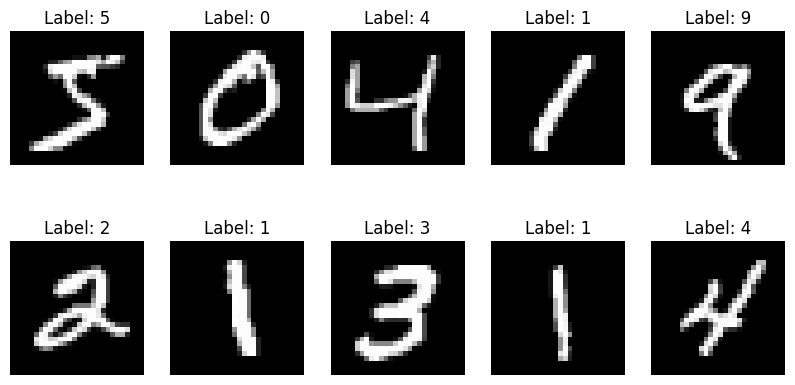

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis('off')
plt.show()

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2374 - accuracy: 0.9312 - val_loss: 0.1233 - val_accuracy: 0.9625
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0999 - accuracy: 0.9693 - val_loss: 0.0846 - val_accuracy: 0.9735
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0699 - accuracy: 0.9778 - val_loss: 0.0915 - val_accuracy: 0.9711
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0549 - accuracy: 0.9824 - val_loss: 0.0879 - val_accuracy: 0.9750
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0438 - accuracy: 0.9855 - val_loss: 0.0811 - val_accuracy: 0.9765
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0346 - accuracy: 0.9884 - val_loss: 0.0869 - val_accuracy: 0.9759
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0285 - accuracy: 0.9907 - val_loss: 0.0962 - val_acc

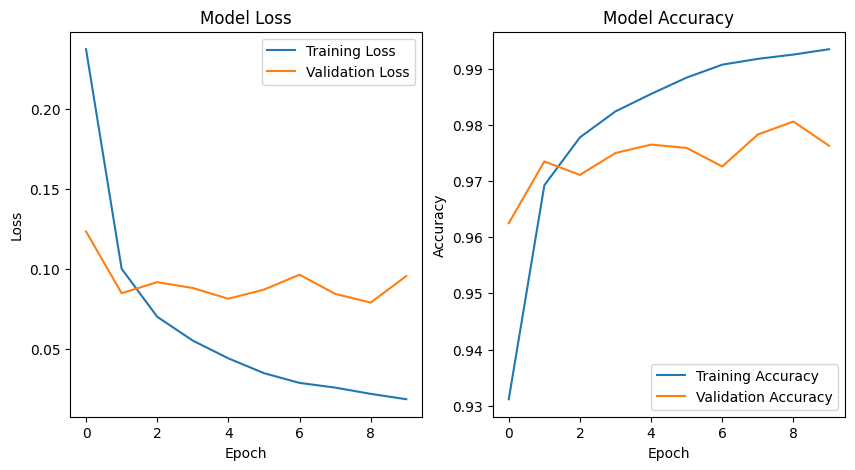

In [ ]:
# Plotting training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Making predictions on test data
predictions = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


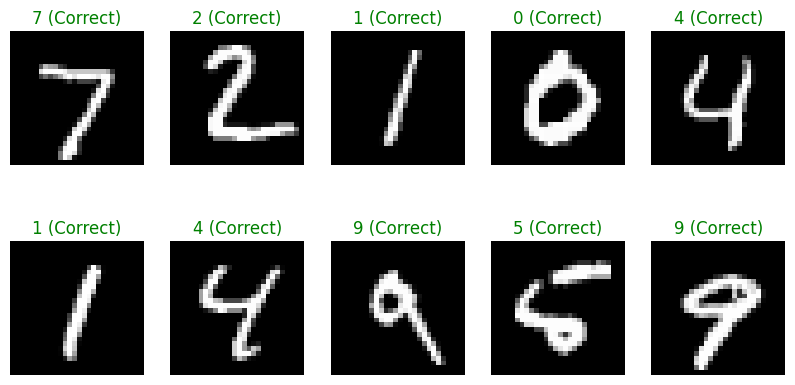

In [ ]:
# Showcasing predictions with labels
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])
    if predicted_label == true_label:
        plt.title(f"{predicted_label} (Correct)", color='green')
    else:
        plt.title(f"{predicted_label} (Wrong: {true_label})", color='red')
    plt.axis('off')
plt.show()